This script solves the 1D heat equation:
$$\frac{\partial u}{\partial t} = \frac{\partial}{\partial x} \left(\alpha(x)\frac{\partial u}{\partial x}\right) $$

with Dirichlet boundary conditions. The numerical scheme is a forward-time centered-space (FTCS) scheme. Note that the stability of the numerical solutions is dependent on the thermal diffusivity, $\alpha(x)$ via the constraint
$$  \alpha \frac{\Delta t}{(\Delta x)^2}  \leq \frac{1}{2}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# First, define the numerical solution for the heat equation
def heateq_1D(alpha, t_domain, x_domain, IC, BC_0, BC_L):
    Nx = len(x_domain)       # Number of spatial grid points
    Nt = len(t_domain)       # Number of time steps
    dx = x_domain[1] - x_domain[0]  # Spatial step size
    dt = t_domain[1] - t_domain[0]  # Time step size

    if np.isscalar(alpha):
        alpha_x = alpha * np.ones(Nx)
    else:
        alpha_x = alpha

    # Initial condition
    u = IC.copy()

    # Boundary conditions
    u[0] = BC_0  # Left boundary (Dirichlet condition)
    u[-1] = BC_L  # Right boundary (Dirichlet condition)

    u_save = np.zeros((Nt, Nx))
    # Time-stepping loop
    for t_i in range(Nt):
        u_new = u.copy()
        for i in range(1, Nx-1):
            da_dx = 0.5*(alpha_x[i+1]-alpha_x[i-1])/dx
            du_dx = 0.5*(u[i+1]-u[i-1])/dx
            d2u_dx = (u[i+1] - 2*u[i] + u[i-1])/dx**2
            u_new[i] = u[i] + dt*(da_dx*du_dx + alpha_x[i]*d2u_dx)
        u = u_new
        u_save[t_i, :] = u

    return u_save


In [44]:

# Parameters
T = 5  # End time for numerical solution
L = 1  # Length of the 1D element
dx = 0.05  # Spatial discretization
dt = 1e-3  # Temporal discretization
x_domain = np.arange(0, L+dx, dx)  # x points
t_domain = np.arange(0, T+dt, dt)  # t points
Nx = len(x_domain)  # Number of x points
Nt = len(t_domain)  # Number of t points

# Initial and boundary conditions
IC = np.ones(Nx)
BC_0 = 4  # BC at x=0
BC_L = 5  # BC at x=L

# Thermal conductivity parameter
alpha = 0.01  # Thermal diffusivity constant (m^2/s)
# alpha = 0.03*np.abs(np.cos(x_domain*2*np.pi))+0.01  # Thermal diffusivity constant (m^2/s)

# Stability check
stab_number = np.max(alpha) * dt / (dx ** 2)
if stab_number >= 0.5:
    raise Warning('Numerical Instability may occur.')


# Run the 1D heat equation solver
u_save = heateq_1D(alpha, t_domain, x_domain, IC, BC_0, BC_L)


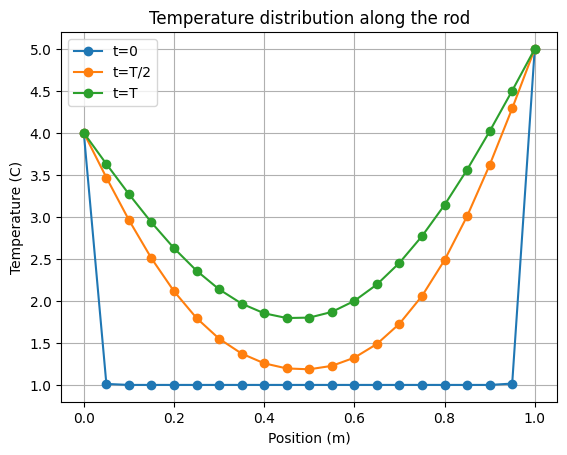

In [45]:

# Plot the final temperature distribution
plt.figure()
plt.plot(x_domain, u_save[0, :], '-o', label='t=0')
plt.plot(x_domain, u_save[len(t_domain)//2, :], '-o', label='t=T/2')
plt.plot(x_domain, u_save[-1, :], '-o', label='t=T')
plt.legend()
plt.xlabel('Position (m)')
plt.ylabel('Temperature (C)')
plt.title('Temperature distribution along the rod')
plt.grid(True)
plt.show()


In [39]:
alpha

array([3.00000000e-02, 2.96306502e-02, 2.85316955e-02, 2.67301957e-02,
       2.42705098e-02, 2.12132034e-02, 1.76335576e-02, 1.36197150e-02,
       9.27050983e-03, 4.69303395e-03, 1.83697020e-18, 4.69303395e-03,
       9.27050983e-03, 1.36197150e-02, 1.76335576e-02, 2.12132034e-02,
       2.42705098e-02, 2.67301957e-02, 2.85316955e-02, 2.96306502e-02,
       3.00000000e-02])